# MACHINE VISION DA 2

#                                                                                                      S SRIVIDHYA

# 20BPS1119

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

# Image in-painting

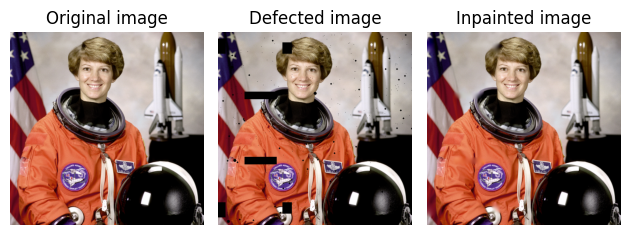

In [6]:
import sklearn as sk
import skimage

from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint

image_orig = data.astronaut()

# Create mask with six block defect regions
mask = np.zeros(image_orig.shape[:-1], dtype=bool)
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1
mask[-60:-30, 170:195] = 1
mask[-180:-160, 70:155] = 1
mask[-60:-20, 0:20] = 1

# add randomly positioned small point-like defects
rstate = np.random.default_rng(0)
for radius in [0, 2, 4]:
    # larger defects are less common
    thresh = 3 + 0.25 * radius  # make larger defects less common
    tmp_mask = rstate.standard_normal(image_orig.shape[:-1]) > thresh
    if radius > 0:
        tmp_mask = binary_dilation(tmp_mask, disk(radius, dtype=bool))
    mask[tmp_mask] = 1

# Apply defect mask to the image over the same region in each color channel
image_defect = image_orig * ~mask[..., np.newaxis]

image_result = inpaint.inpaint_biharmonic(image_defect, mask, channel_axis=-1)

fig, axes = plt.subplots(ncols=3, nrows=1)
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(image_orig)

ax[1].set_title('Defected image')
ax[1].imshow(image_defect)

ax[2].set_title('Inpainted image')
ax[2].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()

# Types of Noise

C:\Users\srivi\AppData\Local\Temp\ipykernel_16852\3831655445.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread("peppers.png")


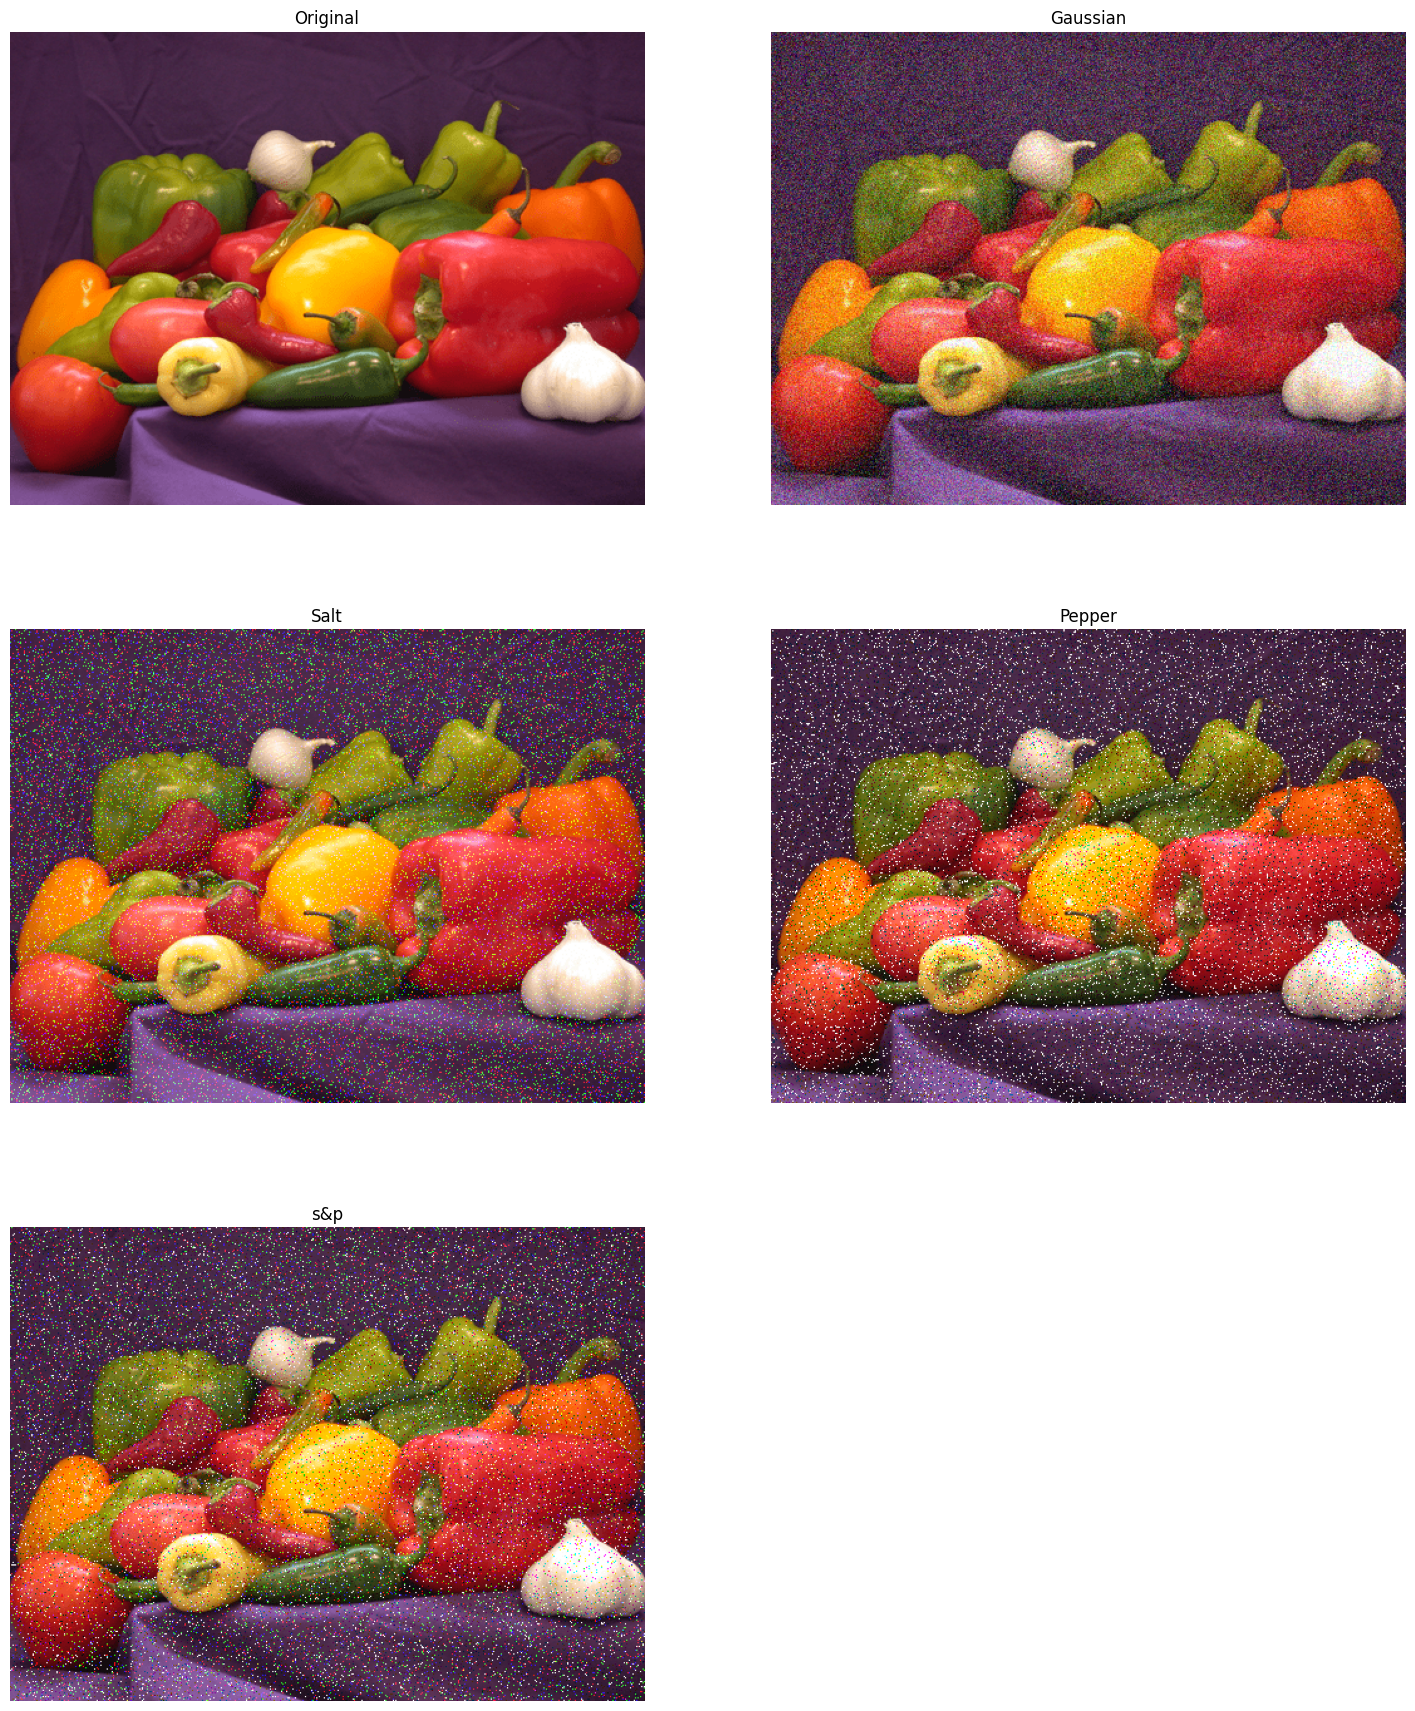

In [14]:
import skimage
import imageio as iio
import matplotlib.pyplot as plt

img = iio.imread("peppers.png")

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,22))
fig.tight_layout()

plotnoise(img, None, 3,2,1)
plt.title('Original')
plotnoise(img, "Gaussian", 3,2,2)
plotnoise(img, "Salt", 3,2,3)
plotnoise(img, "Pepper", 3,2,4)
plotnoise(img, "s&p", 3,2,5)

plt.show()

# Image denoising

C:\Users\srivi\AppData\Local\Temp\ipykernel_6168\1261670240.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img =iio.imread("peppers.png")


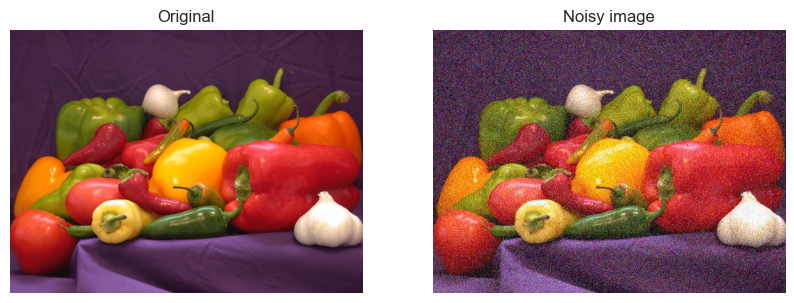

In [24]:
# Import the module and function
from skimage.util import random_noise
import imageio as iio

img =iio.imread("peppers.png")

# Add noise to the image
noisy_image = random_noise(img)

# Show original and resulting image
plot_comparison(img, noisy_image, 'Noisy image')

# Total Variation filter

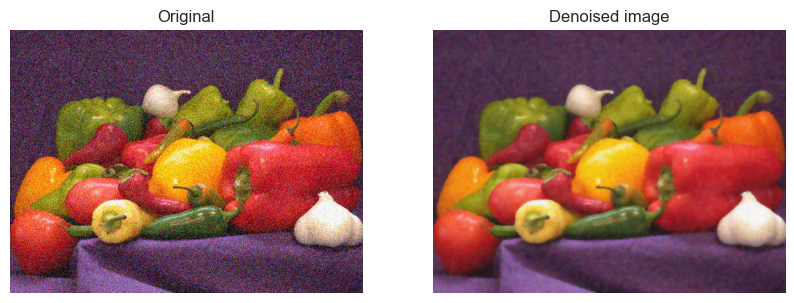

In [25]:
from skimage.restoration import denoise_tv_chambolle
#Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image,weight=0.1,channel_axis=-1)
#Show denoised image
plot_comparison(noisy_image,denoised_image,'Denoised image')


# Bilateral filter

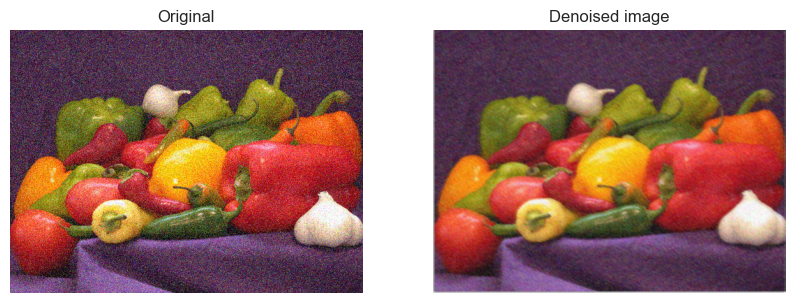

In [26]:
from skimage.restoration import denoise_bilateral
# Apply bilateral filter denoising
denoised_image1 = denoise_bilateral(noisy_image, channel_axis=-1)
# Show original and resulting images
plot_comparison(noisy_image,denoised_image1,'Denoised image')

# Gaussian filter

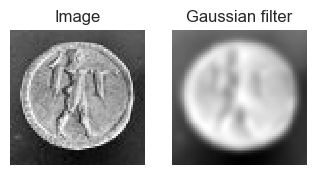

In [27]:
from skimage import data
from skimage import filters
from skimage import restoration

coins = data.coins()
gaussian_image = filters.gaussian(coins, sigma=2)

plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')

plt.subplot(142)
plt.imshow(gaussian_image[10:80, 300:370], cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('Gaussian filter')

plt.show()

# Median filter

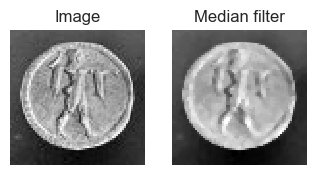

In [28]:
coins = data.coins()

median_image = filters.median(coins, np.ones((3, 3)))

plt.subplot(141)
plt.imshow(coins[10:80, 300:370], cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('Image')

plt.subplot(142)
plt.imshow(median_image[10:80, 300:370], cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('Median filter')

plt.show()

# Mean filter

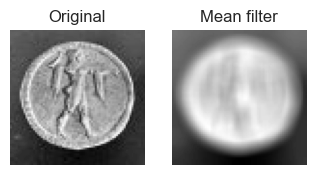

In [29]:
import cv2
coins = data.coins()

figure_size = 9
new_image = cv2.blur(coins[10:80, 300:370],(figure_size, figure_size))

plt.subplot(141), plt.imshow(coins[10:80, 300:370], cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(142), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

C:\Users\srivi\AppData\Local\Temp\ipykernel_6168\222165917.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


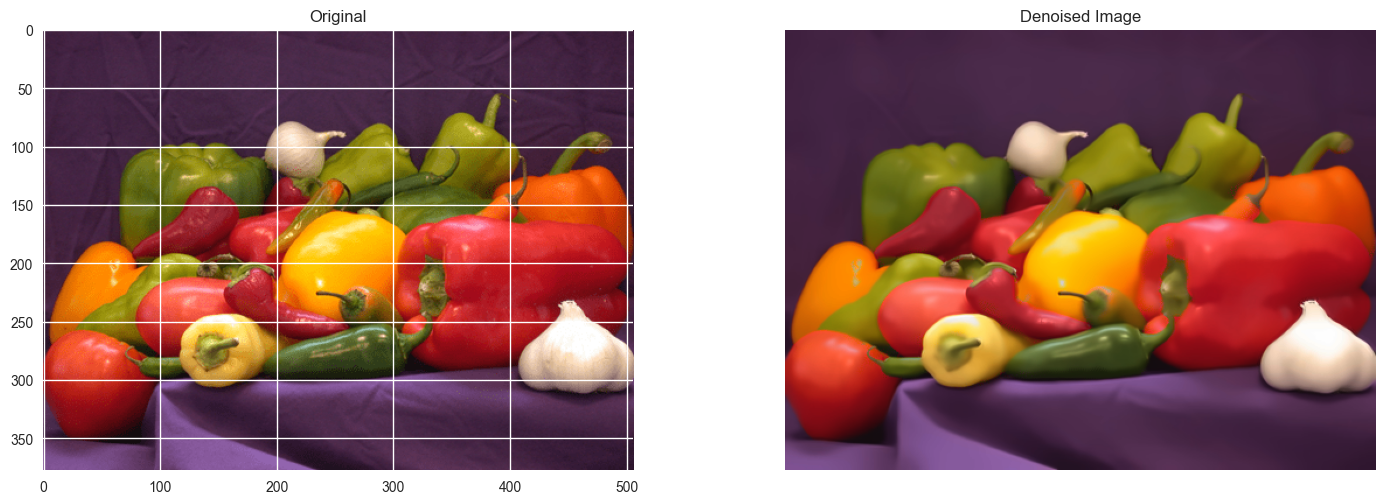

In [30]:
import cv2

plt.style.use('seaborn')
image = cv2.imread('peppers.png')
dst = cv2.fastNlMeansDenoisingColored(image, None, 11, 6, 7, 21)

row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 5))
fig.tight_layout()


axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original')
plt.axis('off')

axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Denoised Image')

plt.show()

# Vertical vs Horizontal Masks (Sobel Operator)

In [31]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

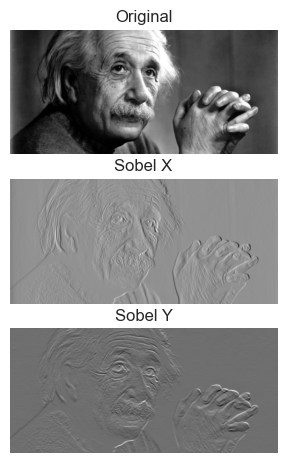

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img0 = cv2.imread('downloads/original.png',)
# converting to gray scale
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
# remove noise
img = cv2.GaussianBlur(gray,(3,3),0)

# convolute with proper kernels
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5) # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5) # y

plt.subplot(3,1,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(3,1,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])

plt.subplot(3,1,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()


# Laplacian Operator

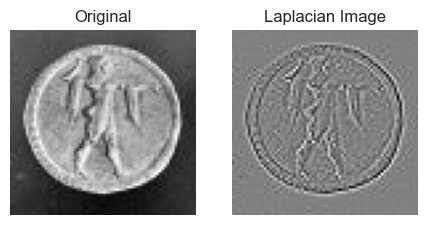

In [33]:
coins = data.coins()

new_image = cv2.Laplacian(coins[10:80, 300:370],cv2.CV_64F)

plt.figure(figsize=(11,6))

plt.subplot(141), plt.imshow(coins[10:80, 300:370], cmap='gray'),plt.title('Original')
plt.axis('off')

plt.subplot(142), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian Image')
plt.axis('off')

plt.show()

# High pass filter (Derivative masks)

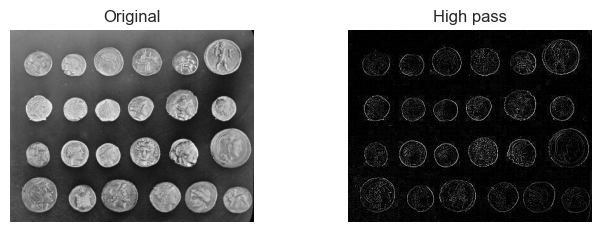

In [43]:
# High Pass Filtering is an edge detection operation

#read image
coins = data.coins()

#edge detection filter
kernel = np.array([[0.0, -1.0, 0.0], 
 [-1.0, 4.0, -1.0],
 [0.0, -1.0, 0.0]])

kernel = kernel/(np.sum(kernel) if np.sum(kernel)!=0 else 1)
#filter the source image
img_rst1 = cv2.filter2D(coins,-1,kernel)

plt.subplot(2,2,1),plt.imshow(coins,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_rst1,cmap = 'gray')
plt.title('High pass'), plt.xticks([]), plt.yticks([])
plt.show()


# Low pass filter (Blurring masks)

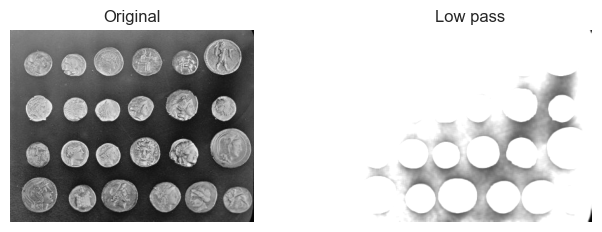

In [42]:
#read image
coins = data.coins()

#prepare the 5x5 shaped filter
kernel = np.array([[1, 1, 1, 1, 1], 
 [1, 1, 1, 1, 1], 
 [1, 1, 1, 1, 1], 
 [1, 1, 1, 1, 1], 
 [1, 1, 1, 1, 1]])
kernel = kernel/sum(kernel)

#filter the source image
img_rst = cv2.filter2D(coins,-1,kernel)

plt.subplot(2,2,1),plt.imshow(coins,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(img_rst,cmap = 'gray')
plt.title('Low pass'), plt.xticks([]), plt.yticks([])

plt.show()
